In [3]:
%load_ext autoreload
%autoreload 2

In [1]:
import os
import numpy as np
import nibabel as nib

from glob import glob

import matplotlib.pyplot as plt
from PIL import Image
from os.path import basename

In [4]:
ROOT_DIR = '/scratche/users/sansiddh/abdomenCT-1k/'
all_masks = glob(ROOT_DIR+'Masks/*.nii.gz')
len(all_masks)


1000

In [5]:
images = glob(ROOT_DIR+'Images/*/*.jpg')
len(images)

['/scratche/users/sansiddh/abdomenCT-1k/Images/00001/00000.jpg',
 '/scratche/users/sansiddh/abdomenCT-1k/Images/00001/00001.jpg',
 '/scratche/users/sansiddh/abdomenCT-1k/Images/00001/00002.jpg',
 '/scratche/users/sansiddh/abdomenCT-1k/Images/00001/00003.jpg',
 '/scratche/users/sansiddh/abdomenCT-1k/Images/00001/00004.jpg',
 '/scratche/users/sansiddh/abdomenCT-1k/Images/00001/00005.jpg',
 '/scratche/users/sansiddh/abdomenCT-1k/Images/00001/00006.jpg',
 '/scratche/users/sansiddh/abdomenCT-1k/Images/00001/00007.jpg',
 '/scratche/users/sansiddh/abdomenCT-1k/Images/00001/00008.jpg',
 '/scratche/users/sansiddh/abdomenCT-1k/Images/00001/00009.jpg',
 '/scratche/users/sansiddh/abdomenCT-1k/Images/00001/00010.jpg',
 '/scratche/users/sansiddh/abdomenCT-1k/Images/00001/00011.jpg',
 '/scratche/users/sansiddh/abdomenCT-1k/Images/00001/00012.jpg',
 '/scratche/users/sansiddh/abdomenCT-1k/Images/00001/00013.jpg',
 '/scratche/users/sansiddh/abdomenCT-1k/Images/00001/00014.jpg',
 '/scratche/users/sansidd

## Create CT Scan Images 

In [5]:
for mask in all_masks:
    ctscan_path = mask.replace('Masks', 'Cases')
    ctscan_path = ctscan_path.replace('.nii.gz', '_0000.nii.gz')

    ctscan = nib.load(ctscan_path).get_fdata()
    for i in range(ctscan.shape[2]):
        ctscan_img = ctscan[:, :, i]
        ctscan_img[ctscan_img > 300] = 300
        ctscan_img[ctscan_img < -300] = -300
        hounsfield_mask = np.rot90(ctscan_img, k=1)
        
        gsimg_channel = ((hounsfield_mask + 300)*255/600).astype(np.uint8)
        img = np.repeat(gsimg_channel[:, :, np.newaxis], 3, axis=2)

        img = Image.fromarray(img)
        id = basename(mask).split('_')[1].split('.')[0]
        imagesdir = f'{ROOT_DIR}Images/{id}/'
        os.makedirs(imagesdir, exist_ok=True)
        
        img.save(imagesdir + '%05d.jpg' % i)
    
    print(f'{mask} done')



/scratche/users/sansiddh/abdomenCT-1k/Masks/Case_00001.nii.gz done
/scratche/users/sansiddh/abdomenCT-1k/Masks/Case_00002.nii.gz done
/scratche/users/sansiddh/abdomenCT-1k/Masks/Case_00003.nii.gz done
/scratche/users/sansiddh/abdomenCT-1k/Masks/Case_00004.nii.gz done
/scratche/users/sansiddh/abdomenCT-1k/Masks/Case_00005.nii.gz done
/scratche/users/sansiddh/abdomenCT-1k/Masks/Case_00006.nii.gz done
/scratche/users/sansiddh/abdomenCT-1k/Masks/Case_00007.nii.gz done
/scratche/users/sansiddh/abdomenCT-1k/Masks/Case_00008.nii.gz done
/scratche/users/sansiddh/abdomenCT-1k/Masks/Case_00009.nii.gz done
/scratche/users/sansiddh/abdomenCT-1k/Masks/Case_00011.nii.gz done
/scratche/users/sansiddh/abdomenCT-1k/Masks/Case_00012.nii.gz done
/scratche/users/sansiddh/abdomenCT-1k/Masks/Case_00014.nii.gz done
/scratche/users/sansiddh/abdomenCT-1k/Masks/Case_00015.nii.gz done
/scratche/users/sansiddh/abdomenCT-1k/Masks/Case_00017.nii.gz done
/scratche/users/sansiddh/abdomenCT-1k/Masks/Case_00018.nii.gz 

(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)


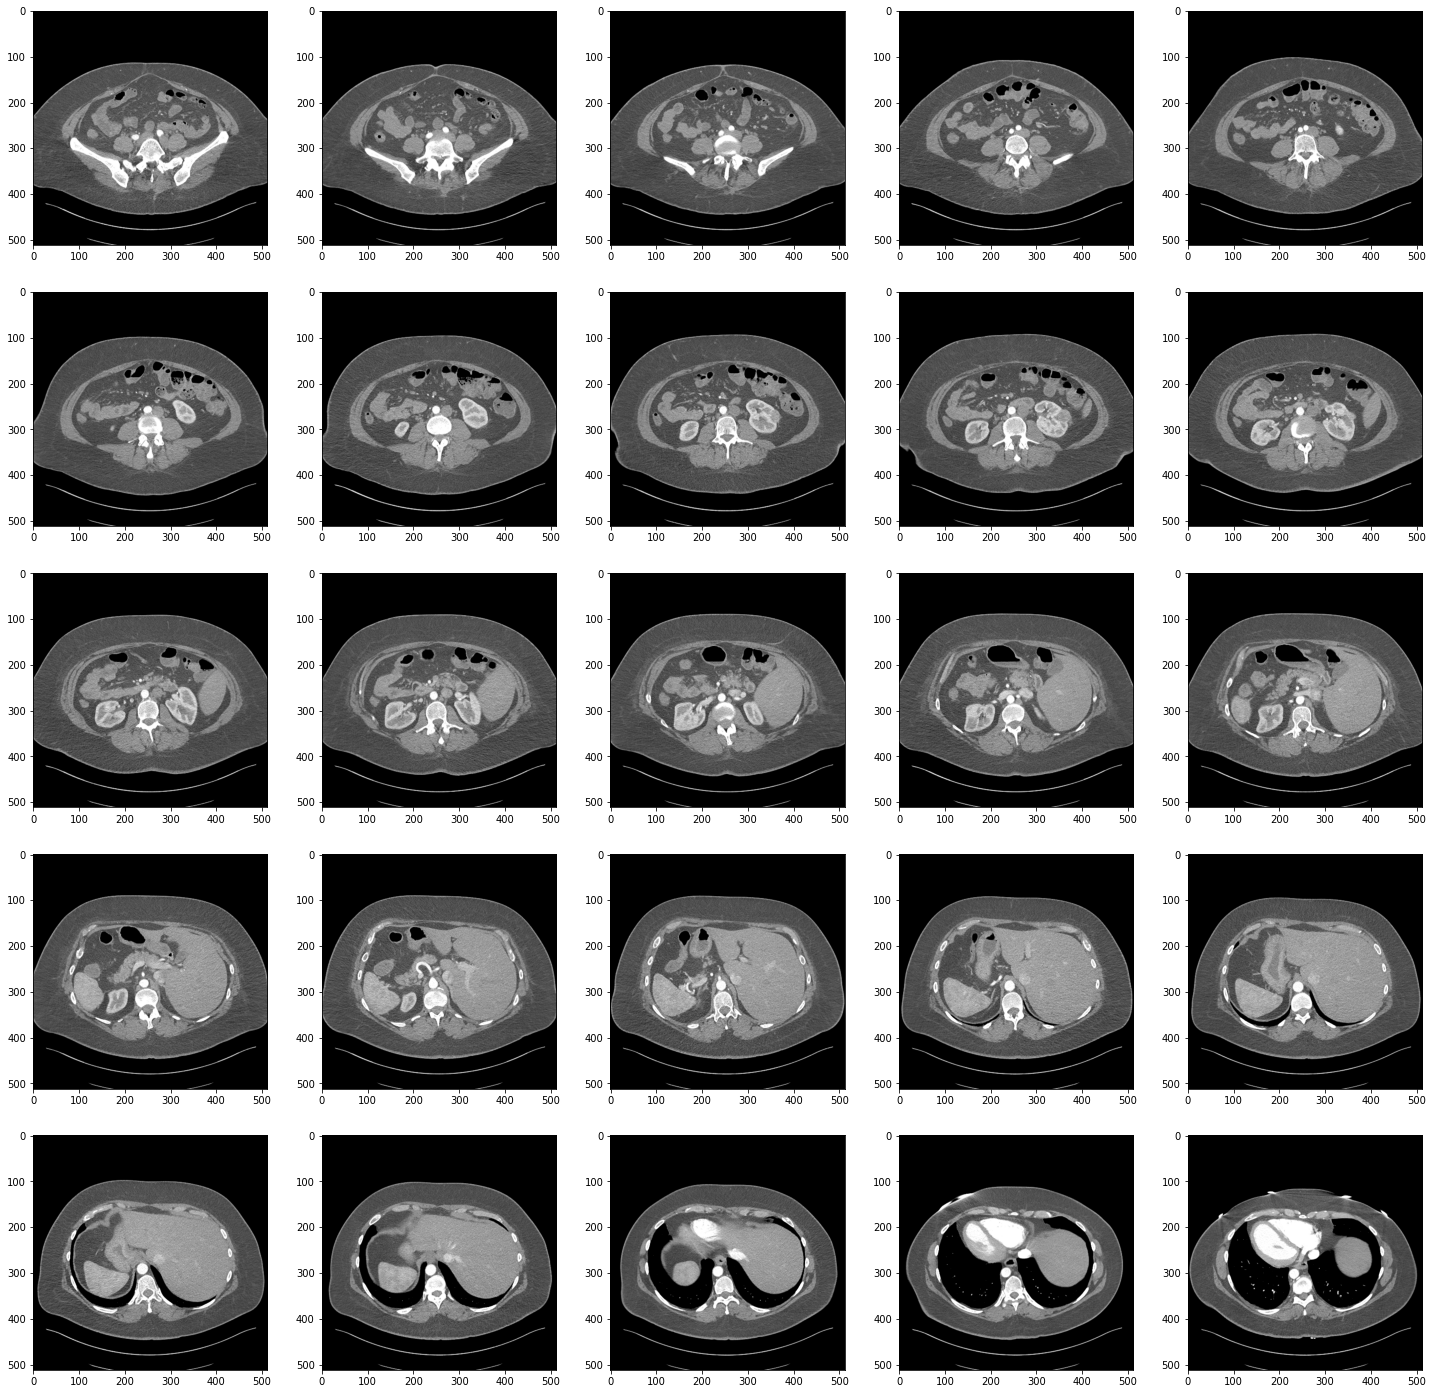

In [25]:
fig, axs = plt.subplots(figsize=(25, 25), nrows=5, ncols=5)
for i in range(25):
    ax = axs.flat[i]
    ctscan[:, :, i*10][ctscan[:, :, i*10] > 300] = 300
    ctscan[:, :, i*10][ctscan[:, :, i*10] < -300] = -300
    hounsfield_mask = np.rot90(ctscan[:, :, i*10], k=1)
    # ax.imshow(hounsfield_mask, cmap='gray')
    gsimg_channel = ((hounsfield_mask + 300)*255/600).astype(int)
    img = np.repeat(gsimg_channel[:, :, np.newaxis], 3, axis=2)
    print(img.shape)
    ax.imshow(img)


[0.]
[0.]
[0.]
[0.]
[0. 2.]
[0. 2.]
[0. 2.]
[0. 2.]
[0. 1. 2.]
[0. 1. 2. 4.]
[0. 1. 2. 4.]
[0. 1. 2. 4.]
[0. 1. 2. 4.]
[0. 1. 2. 4.]
[0. 1. 2. 3. 4.]
[0. 1. 2. 3. 4.]
[0. 1. 2. 3. 4.]
[0. 1. 2. 3. 4.]
[0. 1. 3.]
[0. 1. 3.]
[0. 1. 3.]
[0. 1. 3.]
[0. 1. 3.]
[0. 1.]
[0. 1.]


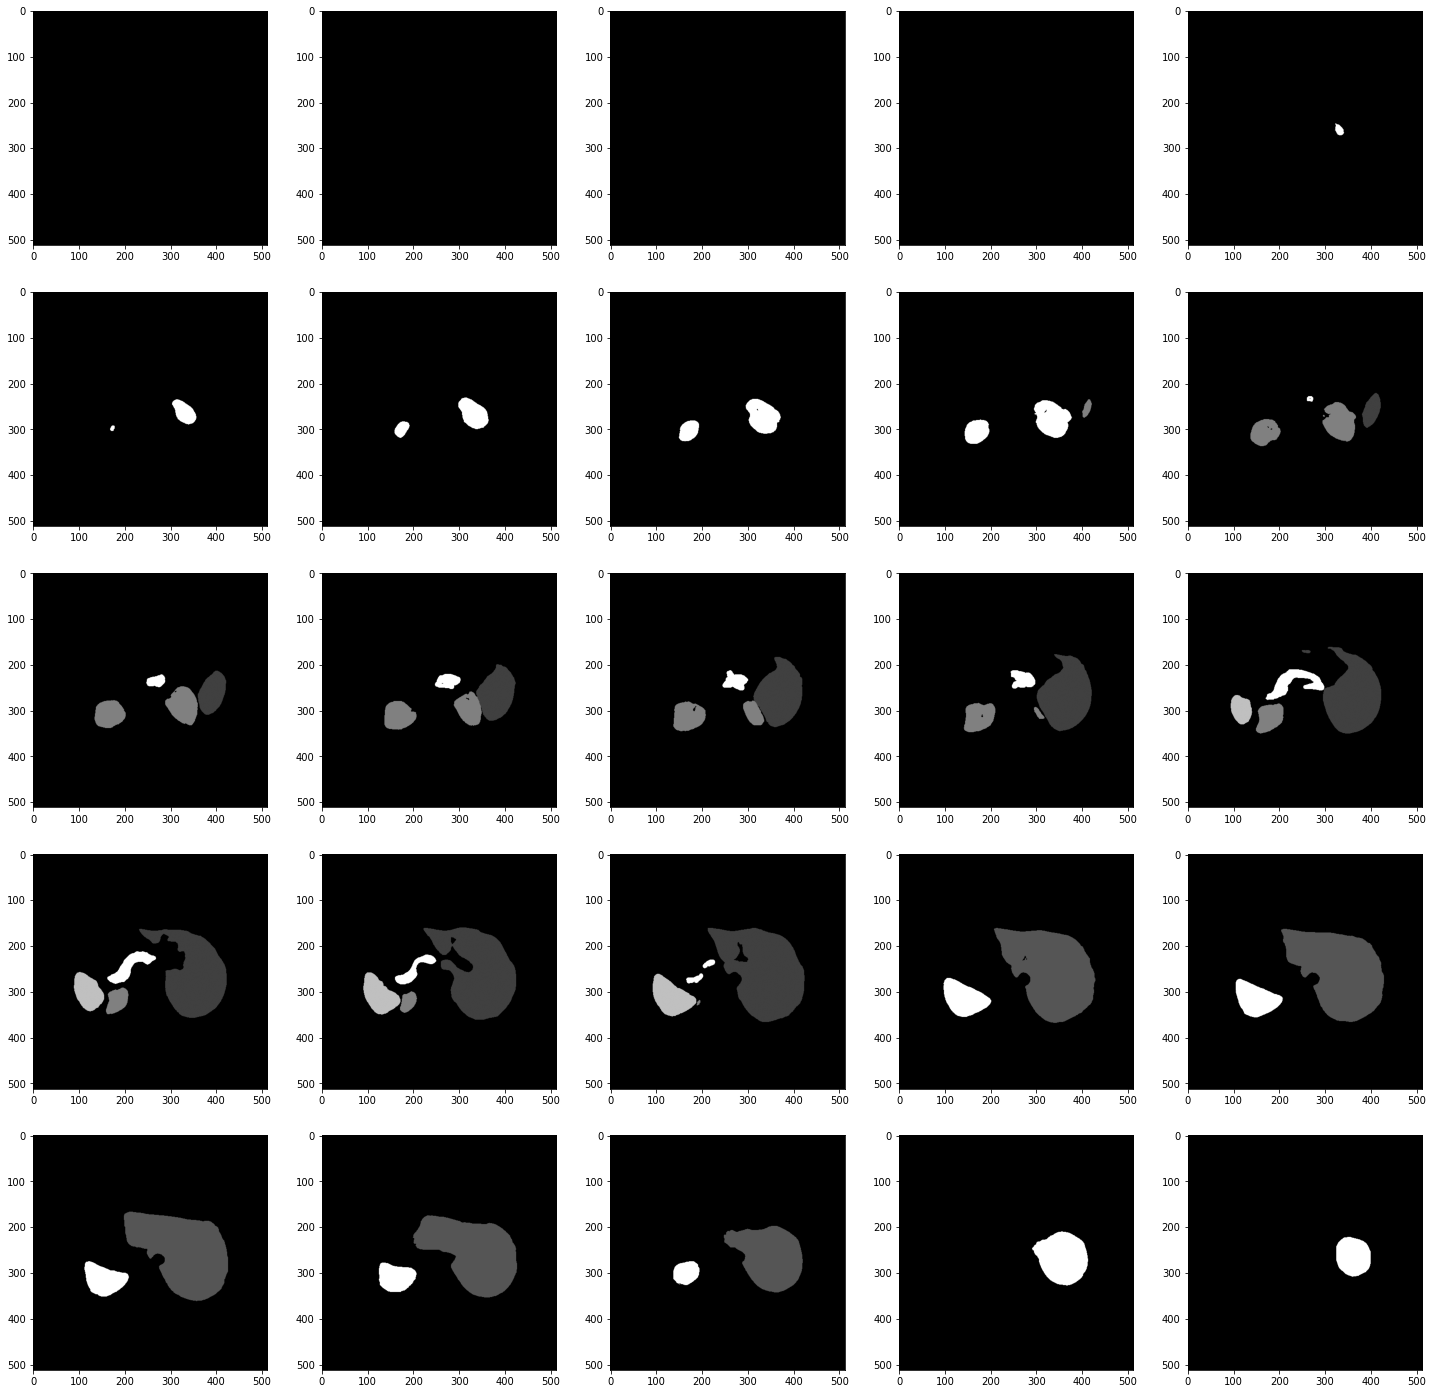

In [ ]:
fig, axs = plt.subplots(figsize=(25, 25), nrows=5, ncols=5)
for i in range(25):
    ax = axs.flat[i]
    ax.imshow(np.rot90(mask[:, :, i*10], k=1), cmap='gray')
    print(np.unique(mask[:, :, i*10]))


In [16]:
kidney_mask = (mask[:, :, 170] == 1).astype(int)
np.unique(kidney_mask*ctscan[:, :, 170])


array([-113., -107.,  -96.,  -88.,  -87.,  -77.,  -68.,  -67.,  -66.,
        -64.,  -63.,  -59.,  -58.,  -56.,  -55.,  -54.,  -53.,  -52.,
        -51.,  -49.,  -47.,  -46.,  -45.,  -44.,  -43.,  -42.,  -41.,
        -40.,  -39.,  -38.,  -37.,  -36.,  -35.,  -34.,  -33.,  -32.,
        -31.,  -30.,  -29.,  -28.,  -27.,  -26.,  -25.,  -24.,  -23.,
        -22.,  -21.,  -20.,  -19.,  -18.,  -17.,  -16.,  -15.,  -14.,
        -13.,  -12.,  -11.,  -10.,   -9.,   -8.,   -7.,   -6.,   -5.,
         -4.,   -3.,   -2.,   -1.,   -0.,    1.,    2.,    3.,    4.,
          5.,    6.,    7.,    8.,    9.,   10.,   11.,   12.,   13.,
         14.,   15.,   16.,   17.,   18.,   19.,   20.,   21.,   22.,
         23.,   24.,   25.,   26.,   27.,   28.,   29.,   30.,   31.,
         32.,   33.,   34.,   35.,   36.,   37.,   38.,   39.,   40.,
         41.,   42.,   43.,   44.,   45.,   46.,   47.,   48.,   49.,
         50.,   51.,   52.,   53.,   54.,   55.,   56.,   57.,   58.,
         59.,   60.,